# Importing libraries

In [12]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

# Sort functions

In [2]:
def tabsort(t):
    n = len(t)
    for j in range (n):
        for i in range (n-1):
            if t[i]>t[i+1]:
                x = t[i]
                t[i] = t[i+1]
                t[i+1] = x
    return t;

In [3]:
def rsort(a):
    n = len(a)
    for j in range (n):
        min = j
        for i in range (j+1,n):
            if a[min]>a[i]:
                min = i
        x = a[j]
        a[j] = a[min]
        a[min] = x
    return a;

In [4]:
#TRI RAPIDE
def part_tab(l,D,F):
#choix du pivot
    pivot = l[F]
    indice_p = D
#partionnement de la liste en deux partie dont les valeur sont sup et inf au pivot:

    for i in range(D, F):
        if l[i] <= pivot:
            l[i], l[indice_p] = l[indice_p], l[i]
            indice_p += 1
    l[indice_p], l[F] = l[F], l[indice_p]
#cette fonction retourne l'indice du pivot :
    return indice_p
def trirap(l,D=0,F=None):
    if F == None :
        F = len(l)-1
    if F > D :
#on fait appelle a la fonction part_tab pour determiner le pivot a chaque traitement
        piv = part_tab(l,D,F)
#tri de la partie inf (gauche):
        trirap(l,D,piv-1)
#tri de la partie sup (droite):
        trirap(l,piv+1,F)
    return l

# Calculating execution time

In [5]:
a1 = np.zeros(10)
a2 = np.zeros(10)
a3 = np.zeros(10)
x = np.zeros(19)
t1 = np.zeros(19)
t2 = np.zeros(19)
t3 = np.zeros(19)

In [6]:
for i in range(100,2000,100):
    for j in range(10):
        v = np.random.random(i)
        l = np.copy(v)
        k = np.copy(v)

        


        debut1 = timeit.default_timer()
        rsort(v)
        fin1 = timeit.default_timer()

        a1[j]= fin1 - debut1

        debut2 = timeit.default_timer()
        tabsort(l)
        fin2 = timeit.default_timer()

        a2[j]= fin2 - debut2

        debut3 = timeit.default_timer()
        trirap(k)
        fin3 = timeit.default_timer()
    
        a3[j]= fin3 - debut3
    
    b = int(i/100)-1
    t1[b] = a1.mean()
    t2[b] = a2.mean()
    t3[b] = a3.mean()
    x[b] = i
       

print("temps d'execution moyen tri par selection",t1)
print("temps d'execution moyen tri à bulles",t2)
print("temps d'execution moyen tri rapide",t3)
print("la taille des vecteurs",x)

temps d'execution moyen tri par selection [0.00444937 0.01939228 0.03887356 0.06729523 0.11790166 0.14466728
 0.19999875 0.28252042 0.33617374 0.52623681 0.71864339 0.56587144
 0.79029341 1.37451914 1.52603309 1.294333   1.22265149 1.35284895
 1.41466609]
temps d'execution moyen tri à bulles [0.01380499 0.05905989 0.10884344 0.19643211 0.31664998 0.43323022
 0.62274457 0.8100045  1.0145457  1.74823139 1.97043648 1.74616983
 2.22843994 4.22688415 5.21949368 4.02146158 3.82621004 3.99131961
 4.59747214]
temps d'execution moyen tri rapide [0.00125533 0.00320456 0.00373425 0.00607849 0.00961108 0.00812823
 0.01105572 0.01396377 0.01360091 0.01929469 0.02308274 0.01944099
 0.0249483  0.04070538 0.04016486 0.03332651 0.03102456 0.02826613
 0.0311038 ]
la taille des vecteurs [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900.]


# Ploting the results

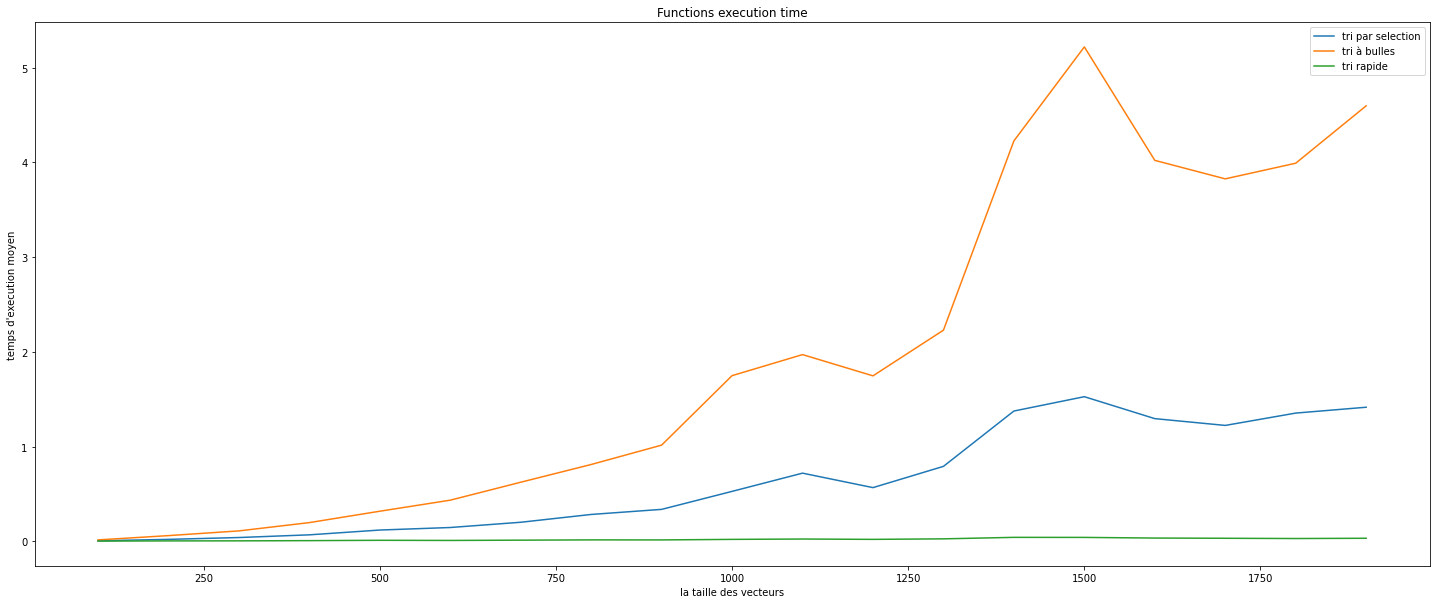

In [20]:
plt.figure(figsize = (25,10))
plt.plot(x, t1, label="tri par selection")
plt.plot(x, t2, label="tri à bulles")
plt.plot(x, t3, label="tri rapide")
plt.xlabel("la taille des vecteurs")
plt.ylabel("temps d'execution moyen")
plt.title('Functions execution time')
plt.legend(["tri par selection", "tri à bulles", "tri rapide"])

plt.show()